In [51]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D
from tensorflow.keras.layers import MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.models import save_model
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from tensorflow.keras.backend import backend as k
from tensorflow.keras.callbacks import History
import cv2
import itertools
import seaborn as sns
import os
import numpy as np
import pandas as pd

from datetime import datetime as dt
import shutil
import random
import glob
import warnings
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
print('Importing Done')

Importing Done


In [2]:
os.chdir(r'D:\Tensorflow\cell_images')

In [3]:
os.listdir(r'D:\Tensorflow\cell_images')

['test', 'train', 'valid']

In [ ]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [14]:
if os.path.isdir(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images/train/Parasitized') is False:
    os.makedirs(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images/train/Parasitized')
    os.makedirs(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images/train/Uninfected')
    os.makedirs(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images/valid/Parasitized')
    os.makedirs(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images/valid/Uninfected')
    os.makedirs(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images/test/Parasitized')
    os.makedirs(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images/test/Uninfected')

In [15]:
Parasitized_files=os.listdir(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\Parasitized')
Uninfected_files=os.listdir(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\Uninfected')
print('Number of images of type parasitized:',len(Parasitized_files))
print('Number of images of type Uninfected:',len(Uninfected_files))


Number of images of type parasitized: 13780
Number of images of type Uninfected: 13780


In [16]:
# creating datasets for the train, validation and test 
# parasitized files 
Parasitized_files_train_images= random.sample(Parasitized_files,8000)
Parasitized_files_valid_images= random.sample(list(set(Parasitized_files)-set(Parasitized_files_train_images)),3000)
Parasitized_files_test_images=list(set(Parasitized_files)-set(Parasitized_files_valid_images)-set(Parasitized_files_train_images))

for file in (Parasitized_files_train_images):
    if (file.endswith('png')):
        image=cv2.imread(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\Parasitized/'+file)
        resized_image=cv2.resize(image,(128,128), interpolation = cv2.INTER_NEAREST)
        cv2.imwrite(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\train\Parasitized/'+file, resized_image)
print('Train folder has been created for Parasitized images ')
    
for file in (Parasitized_files_valid_images):
    if (file.endswith('png')):
        image=cv2.imread(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\Parasitized/'+file)
        resized_image=cv2.resize(image,(128,128), interpolation = cv2.INTER_NEAREST)
        cv2.imwrite(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\valid\Parasitized/'+file, resized_image)
print('Validation folder has been created for Parasitized images ')

for file in (Parasitized_files_test_images):
    if (file.endswith('png')):
        image=cv2.imread(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\Parasitized/'+file)
        resized_image=cv2.resize(image,(128,128), interpolation = cv2.INTER_NEAREST)
        cv2.imwrite(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\test\Parasitized/'+file, resized_image)
print('Test folder has been created for Parasitized images ')

Train folder has been created for Parasitized images 
Validation folder has been created for Parasitized images 
Test folder has been created for Parasitized images 


In [17]:
# creating datasets for the train, validation and test 
# parasitized files 
Uninfected_files_train_images= random.sample(Uninfected_files,8000)
Uninfected_files_valid_images= random.sample(list(set(Uninfected_files)-set(Uninfected_files_train_images)),3000)
Uninfected_files_test_images=list(set(Uninfected_files)-set(Uninfected_files_valid_images)-set(Uninfected_files_train_images))

for file in (Uninfected_files_train_images):
    if (file.endswith('png')):
        image=cv2.imread(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\Uninfected/'+file)
        resized_image=cv2.resize(image,(128,128), interpolation = cv2.INTER_NEAREST)
        cv2.imwrite(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\train\Uninfected/'+file, resized_image)
print('Train folder has been created for Uninfected  images ')
    
for file in (Uninfected_files_valid_images):
    if (file.endswith('png')):
        image=cv2.imread(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\Uninfected/'+file)
        resized_image=cv2.resize(image,(128,128), interpolation = cv2.INTER_NEAREST)
        cv2.imwrite(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\valid\Uninfected/'+file, resized_image)
print('Validation folder has been created for Uninfected valid images ')

for file in (Uninfected_files_test_images):
    if (file.endswith('png')):
        image=cv2.imread(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\Uninfected/'+file)
        resized_image=cv2.resize(image,(128,128), interpolation = cv2.INTER_NEAREST)
        cv2.imwrite(r'C:\Users\vamsi\Desktop\Tensor flow\cell_images\test\Uninfected/'+file, resized_image)
print('Test folder has been created for Uninfected  images ')

Train folder has been created for Uninfected  images 
Validation folder has been created for Uninfected valid images 
Test folder has been created for Uninfected  images 


In [65]:
train_file_names=[r'D:\Tensorflow\cell_images\train\Parasitized/'+fname for fname in os.listdir(r'D:\Tensorflow\cell_images\train\Parasitized/')]+\
                                             [r'D:\Tensorflow\cell_images\train\Uninfected/'+fname for fname in os.listdir(r'D:\Tensorflow\cell_images\train\Uninfected/')]

X_train=[cv2.imread(image) for image in train_file_names]
X_train=np.array(X_train)
y_train=['Parasitized']*8000 +['Uninfected']*7999


val_file_names=[r'D:\Tensorflow\cell_images\valid\Parasitized/'+fname for fname in os.listdir(r'D:\Tensorflow\cell_images\valid\Parasitized/')]+\
                                             [r'D:\Tensorflow\cell_images\valid\Uninfected/'+fname for fname in os.listdir(r'D:\Tensorflow\cell_images\valid\Uninfected/')]
X_valid=[cv2.imread(image) for image in val_file_names]
X_valid=np.array(X_valid)
y_valid=['Parasitized']*3000 +['Uninfected']*3000


test_file_names=[r'D:\Tensorflow\cell_images\test\Parasitized/'+fname for fname in os.listdir(r'D:\Tensorflow\cell_images\test\Parasitized/')]+\
                                             [r'D:\Tensorflow\cell_images\test\Uninfected/'+fname for fname in os.listdir(r'D:\Tensorflow\cell_images\test\Uninfected/')]
X_test=[cv2.imread(image) for image in test_file_names]
X_test=np.array(X_test)
y_test=['Parasitized']*2779 +['Uninfected']*2780

X_train=X_train.astype('float32')
X_valid=X_valid.astype('float32')
X_test=X_test.astype('float32')

X_train=X_train/255
X_valid=X_valid/255
X_test=X_test/255

print('Shape of train dataset:', X_train.shape)
print('Shape of valid dataset:', X_valid.shape)
print('Shape of test dataset:', X_test.shape)

Shape of train dataset: (15999, 128, 128, 3)
Shape of valid dataset: (6000, 128, 128, 3)
Shape of test dataset: (5559, 128, 128, 3)


In [5]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


RuntimeError: Physical devices cannot be modified after being initialized

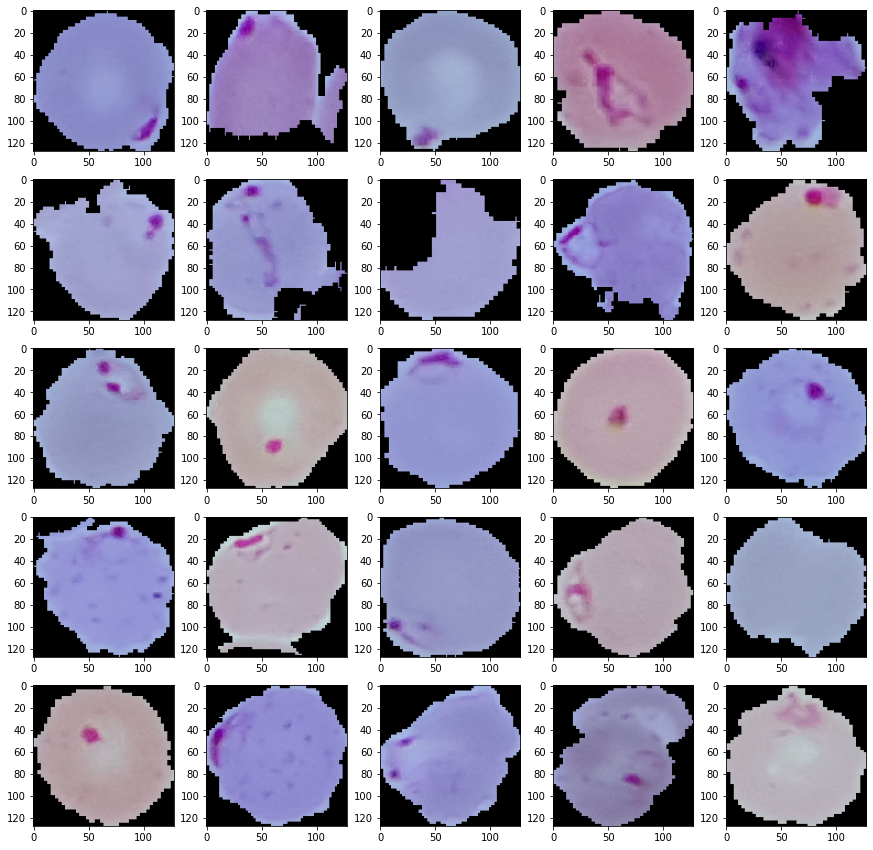

In [6]:
Parasitized_images=r'D:\Tensorflow\cell_images\train\Parasitized'
Parasitized_sample_images=random.sample(os.listdir(Parasitized_images),26)

plt.figure(figsize=(15,15))
for i in range(1,len(Parasitized_sample_images)):
    row=i
    image=cv2.imread(r'D:\Tensorflow\cell_images\train\Parasitized/'+Parasitized_sample_images[i])
    plt.subplot(5,5,row)
    plt.imshow(image)
plt.show()

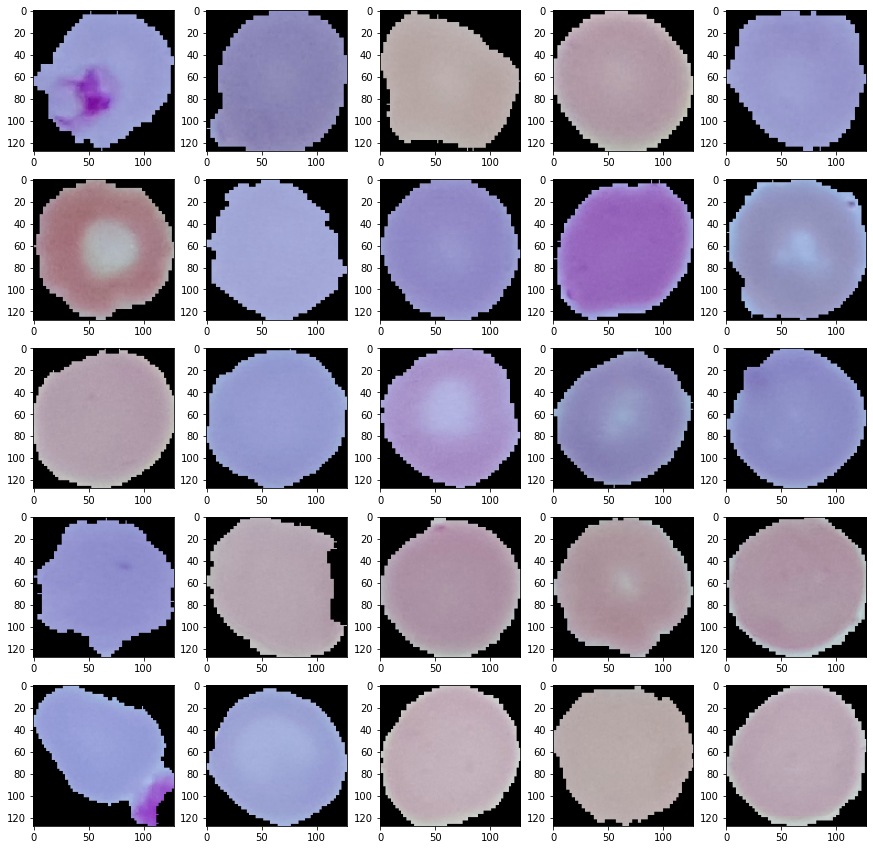

In [7]:
Uninfected_images=r'D:\Tensorflow\cell_images\train\Uninfected'
Uninfected_sample_images=random.sample(os.listdir(Uninfected_images),26)

plt.figure(figsize=(15,15))
for i in range(1,len(Uninfected_sample_images)):
    row=i
    image=cv2.imread(r'D:\Tensorflow\cell_images\train\Uninfected/'+Uninfected_sample_images[i])
    plt.subplot(5,5,row)
    plt.imshow(image)
plt.show()

In [74]:
def plt_train_val_acc(x,val_acc,train_acc,colors=['b']):
    plt.figure(figsize=(12,6))
    plt.grid()
    plt.plot(x,val_acc,'b',label="Validation Accuracy")
    plt.plot(x,train_acc,'r',label="Train Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel('Accuracy after each epoch')
    plt.legend()
    
def plt_train_val_loss(x,val_loss,train_loss,colors=['b']):
    plt.figure(figsize=(12,6))
    plt.grid()
    plt.plot(x,val_loss,'b',label="Validation Loss")
    plt.plot(x,train_loss,'r',label="Train Loss")
    plt.xlabel("Epochs")
    plt.ylabel('Binary Crossentropy loss')
    plt.legend()

In [75]:
def plot_confusion_matrix(test_y,predict_y):
    C=confusion_matrix(test_y,predict_y)#Binary Confusion Matrix
    A=(((C.T)/(C.sum(axis=1))).T)#Recall Matrix
    B=(C/C.sum(axis=0))#Precision Matrix
    
    plt.figure(figsize=(20,4))
    labels=[0,1]
    
    cmap=sns.light_palette('blue')
    plt.subplot(1,3,1)
    sns.heatmap(C,annot=True,cmap=cmap,fmt='.3f',xticklabels=labels,yticklabels=labels)
    plt.xlabel('Predicted class')
    plt.ylabel('Orginal class')
    plt.title('Confusion matrix [0:Uninfected, 1:Parasitized]')
    
    plt.subplot(1,3,2)
    sns.heatmap(B,annot=True,cmap=cmap,fmt='.3f',xticklabels=labels,yticklabels=labels)
    plt.xlabel('Predicted class')
    plt.ylabel('Orginal class')
    plt.title('Precision matrix [0:Uninfected, 1:Parasitized]')
    
    plt.subplot(1,3,3)
    sns.heatmap(A,annot=True,cmap=cmap,fmt='.3f',xticklabels=labels,yticklabels=labels)
    plt.xlabel('Predicted class')
    plt.ylabel('Orginal class')
    plt.title('Recall matrix [0:Uninfected, 1:Parasitized]')
    
    plt.show()

In [84]:
img_width, img_height=128,128

train_data_dir=r'D:\Tensorflow\cell_images\train'
validation_data_dir=r'D:\Tensorflow\cell_images\valid'
nb_train_samples=15999
nb_validation_samples=6000
epochs=300
batch_size=20

if tf.keras.backend.image_data_format()=='channels_first':
    intput_shape=(3,img_width, img_height)
else:
    intput_shape=(img_width, img_height,3)

In [85]:
encoder=LabelEncoder()
encoder.fit(y_train)
encoder.fit(y_valid)
encoder.fit(y_test)
y_train_enc=encoder.transform(y_train)
y_valid_enc=encoder.transform(y_valid)
y_test_enc=encoder.transform(y_test)


In [86]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                shear_range=0.2,
                                rotation_range=20,
                                width_shift_range=0.2)

val_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(r'D:\Tensorflow\cell_images\train',
                                                  target_size=(128,128),
                                                   batch_size=batch_size,
                                                   class_mode='binary')

validation_generator=val_datagen.flow_from_directory(r'D:\Tensorflow\cell_images\valid',
                                                  target_size=(128,128),
                                                   batch_size=batch_size,
                                                   class_mode='binary')



Found 15999 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.


In [87]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(128,128,3),kernel_initializer='he_normal'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    BatchNormalization(),
    Flatten(),
    Dense(units=512, activation='relu', kernel_initializer='he_uniform'),
    Dropout(rate=0.5),
    BatchNormalization(),
    Dense(units=512, activation='relu', kernel_initializer='he_uniform'),
    Dropout(rate=0.5),
    Dense(units=1, activation='sigmoid', kernel_initializer='glorot_uniform')
    
])

In [88]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 16, 16, 128)      

In [89]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

In [90]:
hist=History()
filepath=r'D:\Tensorflow\cell_images\model/malaria_cnn_model3-{epoch:02d}.hdf5'
save=ModelCheckpoint(filepath,monitor='val_loss',verbose=0,save_best_only=True,save_weights_only=False, mode='auto')


In [91]:
model.fit(x=train_generator,
    steps_per_epoch=nb_train_samples//batch_size,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size,
    callbacks=[hist,save],
    epochs=300,
    verbose=1
)


  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 799 steps, validate for 300 steps
Epoch 1/300
799/799 [==============================] - 100s 126ms/step - loss: 0.8622 - accuracy: 0.5601 - val_loss: 0.6507 - val_accuracy: 0.6320
Epoch 2/300
799/799 [==============================] - 82s 102ms/step - loss: 0.7320 - accuracy: 0.6283 - val_loss: 0.7324 - val_accuracy: 0.5910
Epoch 3/300
799/799 [==============================] - 82s 103ms/step - loss: 0.6052 - accuracy: 0.6950 - val_loss: 0.6874 - val_accuracy: 0.7023
Epoch 4/300
799/799 [==============================] - 87s 109ms/step - loss: 0.3979 - accuracy: 0.8296 - val_loss: 0.4844 - val_accuracy: 0.8193
Epoch 5/300
799/799 [==============================] - 88s 110ms/step - loss: 0.3073 - accuracy: 0.8806 - val_loss: 0.2385 - val_accuracy: 0.9207
Epoch 6/300
799/799 [==============================] - 88s 110ms/step - loss: 0.2787 - accuracy: 0.8936 - val_loss: 0.2164 - val_accuracy: 0.9255
Epoch 7/300
799/799 [========

In [92]:
if os.path.isfile(r'D:\Tensorflow\cell_images\model/malaria_cnn_model300.h5') is False:
    model.save(r'D:\Tensorflow\cell_images\model/malaria_cnn_model300.h5')

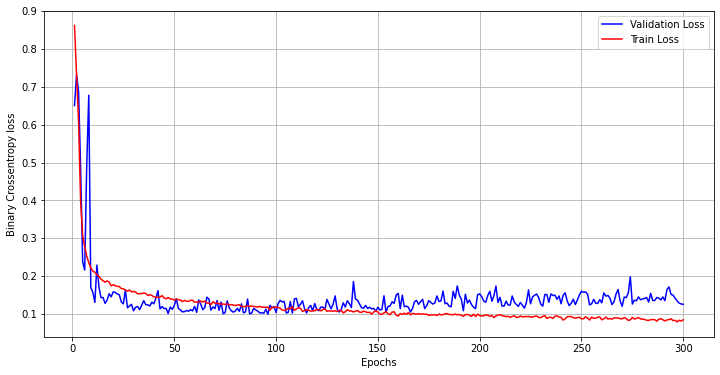

In [93]:
history=model.history
x=list(range(1,epochs+1))
val_loss=history.history['val_loss']
train_loss=history.history['loss']
plt_train_val_loss(x,val_loss,train_loss)

#val_loss=history.history['val_acc']
#train_loss=history.history['acc']
#plt_train_val_acc(x,val_acc,train_acc)


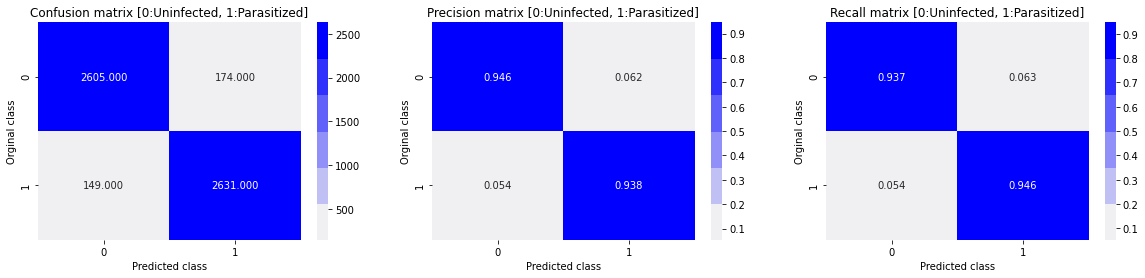

classification report on test(unseen) data

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2779
           1       0.94      0.95      0.94      2780

    accuracy                           0.94      5559
   macro avg       0.94      0.94      0.94      5559
weighted avg       0.94      0.94      0.94      5559

Test accuracy on unseen data: 



0.9418960244648318

In [94]:
# Model predection
model=load_model(r'D:\Tensorflow\cell_images\model/malaria_cnn_model300.h5')

y_pred=model.predict_classes(X_test,verbose=0)

# plotting Confusion matrix, Precision and Recall

plot_confusion_matrix(y_test_enc,y_pred) # confusion matrix

print('classification report on test(unseen) data\n')  # Precision
print(classification_report(y_test_enc,y_pred))

print('Test accuracy on unseen data: \n') # Recall
accuracy_score(y_test_enc, y_pred)

In [95]:
def process_image(img_dir):
    test_image=cv2.imread(img_dir)
    test_image=cv2.resize(test_image,(128,128),interpolation=cv2.INTER_AREA)
    test_image=np.array(test_image)
    test_image=test_image/255
    test_image=np.expand_dims(test_image, axis=0)
    return test_image

In [96]:
def predict_image(img_dir):
    test_image=process_image(img_dir)
    y_proba_class0=model.predict_proba(test_image).flatten().tolist()[0]*100
    y_proba_class1 =100.0-y_proba_class0
    
    print('probability of the input image to be Parasitized: {:.6f}%'.format(y_proba_class1))
    print('probability of the input image to be Uninfected: {:.6f}%'.format(y_proba_class0))
    
    print()
    if (y_proba_class1> y_proba_class0):
        print('The cell image is infected with Malaria')
    else:
        print('The cell image is not infected with Malaria')
    

In [97]:
model=load_model(r'D:\Tensorflow\cell_images\model/malaria_cnn_model300.h5')
print('Trained model loaded successfully...\n')
img_dir=r'D:\Tensorflow\cell_images/testing/'+'image.png'
#MODEL_DIR='models/'

st=dt.now()
predict_image(img_dir)
end=dt.now()-st

print('\n Time taken to analyse the image and predict the result:',end)

Trained model loaded successfully...

probability of the input image to be Parasitized: 100.000000%
probability of the input image to be Uninfected: 0.000000%

The cell image is infected with Malaria

 Time taken to analyse the image and predict the result: 0:00:00.207445
